# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS


Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 
Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.
Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.
Part 4: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
Deliverables:
•	Include visualizations and explanations for the choices and findings at each step.
•	Well-commented Python code that used to conduct the analysis and build the models.
Assessment Criteria:
•	Accuracy and completeness of the data preparation and exploration steps.
•	Justification for model selection and parameter tuning decisions.
•	Clarity and depth of the analysis in the diagnostics and model evaluation stages.
This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.



### 1: Data Preparation and Exploration

##### 1. Load the Dataset

In [5]:
import pandas as pd
df=pd.read_csv(r'C:/Users/DELL/Desktop/DATAsets/exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [11]:
# parse_dates=['Date']: Converts the "Date" column into a datetime format.
# index_col='date'
df=pd.read_csv(r'C:/Users/DELL/Desktop/DATAsets/exchange_rate.csv', parse_dates=['date'], index_col='date')
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


##### 2. Initial Exploration

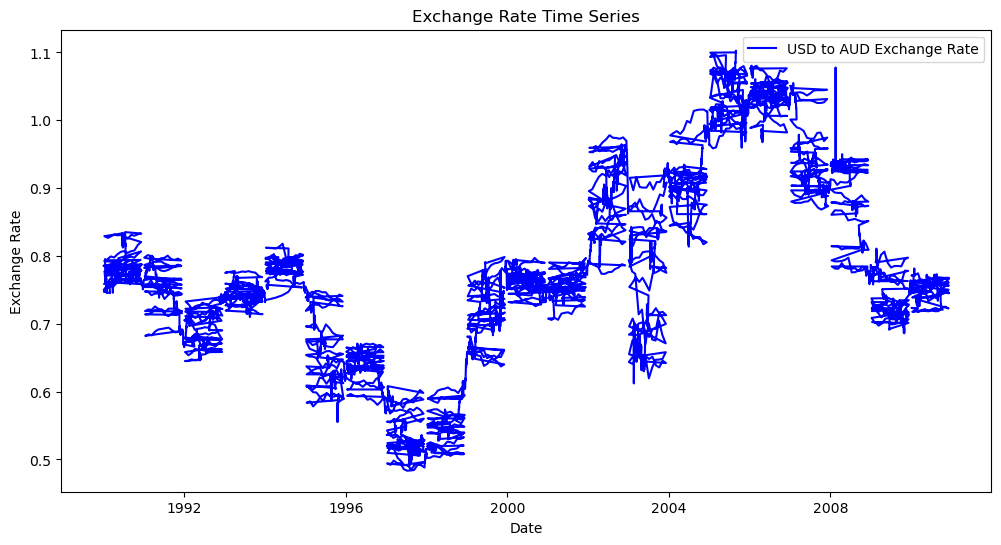

In [14]:
# visualizing the time series to understand its trend, seasonality, and anomalies.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df, label='USD to AUD Exchange Rate', color='blue')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.legend()
plt.show()

In [16]:
#Trend: Is the exchange rate increasing, decreasing, or stable over time : Exchange Rate is slightly decreased to its lowest (0.5) in between 1996 and 2000 and increased to (1.1) that is the highest betweeen 2004 and 2008.
#Seasonality: these periodic patterns are yearly fluctuations.
#Anomalies: there is sudden spike near 2000.


#### 3. Data Preprocessing

##### Handling Missing Values

In [23]:
#Checking for missing values
print(df.isnull().sum())

Ex_rate    0
dtype: int64


<Axes: xlabel='Ex_rate'>

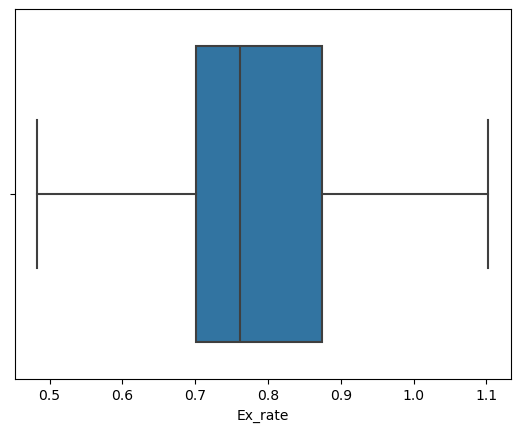

In [33]:
#If there are outliers, we can detect them using a boxplot:
import seaborn as sns
sns.boxplot(x=df['Ex_rate'])

In [35]:
# I can not detect any outlier in this boxplot

### 2: ARIMA Model

#### 1. Parameter Selection

In [45]:
#We use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to determine ARIMA parameters (p, d, q).

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

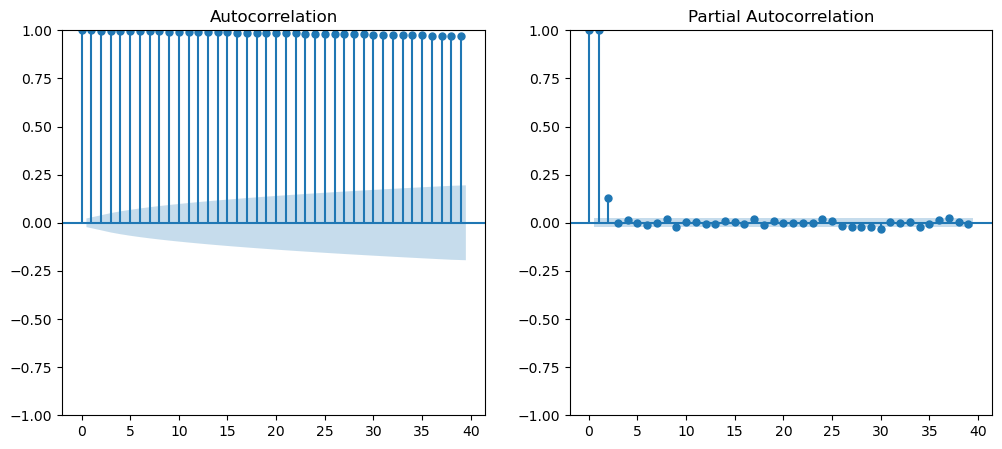

In [51]:
# Plot ACF and PACF
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_acf(df, ax=ax[0])  ## ACF for q (moving average)
plot_pacf(df, ax=ax[1])   ## PACF for p (autoregressive)
plt.show()

In [53]:
df_diff=df.diff().dropna() 

In [57]:
df_diff

,Ex_rate
date,
1990-02-01,-0.003700
1990-03-01,0.004900
1990-04-01,-0.000700
1990-05-01,-0.001100
1990-06-01,0.001700
...,...
2010-06-10,-0.000207
2010-07-10,0.003345
2010-08-10,0.001358


##### 2. Fit ARIMA Model

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [78]:
## 1. Extract exchange rate column
Ex_rate = df['Ex_rate']

In [80]:
Ex_rate

date
1990-01-01    0.785500
1990-02-01    0.781800
1990-03-01    0.786700
1990-04-01    0.786000
1990-05-01    0.784900
                ...   
2010-06-10    0.718494
2010-07-10    0.721839
2010-08-10    0.723197
2010-09-10    0.720825
2010-10-10    0.720825
Name: Ex_rate, Length: 7588, dtype: float64

In [82]:
# 2.Determine Differencing Order (d)
adf_test = adfuller(Ex_rate)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

#If p_value > 0.05, apply differencing
if adf_test[1] > 0.05:
    Ex_rate_diff = Ex_rate.diff().dropna()
    d = 1    #first differencing
else:
    Ex_rate_diff = Ex_rate
    d = 0

ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974


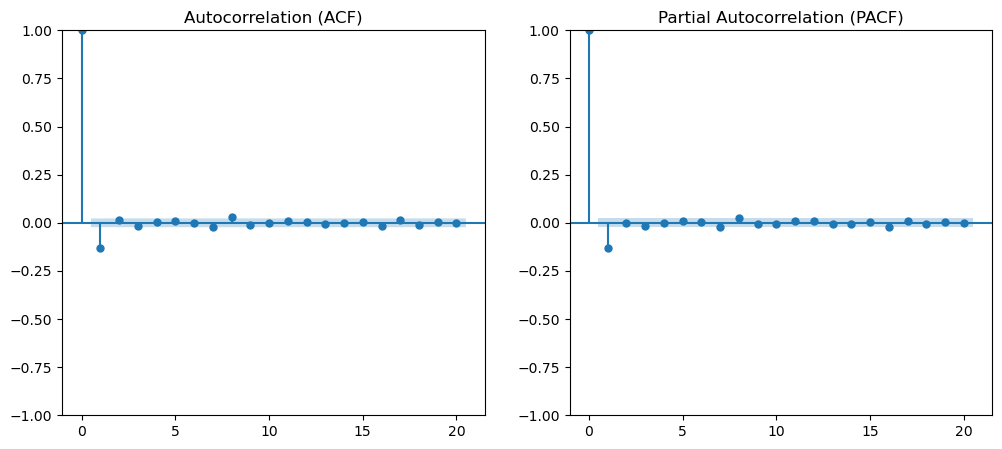

In [86]:
# 3: Plot ACF and PACF to Determine p and q
plt.figure(figsize=(12,5))

# ACF Plot
plt.subplot(121)
plot_acf(Ex_rate_diff, lags=20, ax=plt.gca())
plt.title("Autocorrelation (ACF)")

#PACF Plot
plt.subplot(122)
plot_pacf(Ex_rate_diff, lags=20, ax=plt.gca())
plt.title("Partial Autocorrelation (PACF)")

plt.show()

In [90]:
#Define p and q based on ACF and PACF plots
p = 2
q = 2

In [94]:
# Fit ARIMA Model
model = ARIMA(Ex_rate, order=(p,d,q)) 
arima_result = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

In [96]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Fri, 31 Jan 2025   AIC                         -56100.135
Time:                        17:21:55   BIC                         -56065.464
Sample:                             0   HQIC                        -56088.236
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.978      -1.162       1.129
ma.L2         -0.1135      0.052     -2.172      0.030      -0.216      -0.011
sigma2      3.594e-05   1.01e-07    355.944      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2863303.88
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
#Forcast
forecast_steps = 10  
forecast = arima_result.forecast(steps=forecast_steps)
forecast

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


7588    0.720809
7589    0.720841
7590    0.720835
7591    0.720839
7592    0.720838
7593    0.720839
7594    0.720839
7595    0.720839
7596    0.720839
7597    0.720839
Name: predicted_mean, dtype: float64

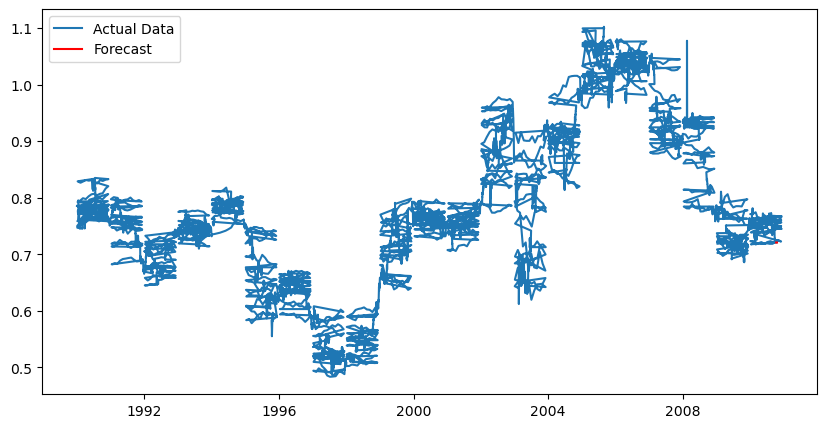

In [104]:
## Plot Forecast
plt.figure(figsize=(10,5))
plt.plot(Ex_rate, label="Actual Data")
plt.plot(pd.date_range(start=Ex_rate.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label="Forecast", color='red')
plt.legend()
plt.show()

In [108]:
# That was all about defining p,q,d  model parameters

In [110]:
#ARIMA(p, d, q) model our chosen parameters.
from statsmodels.tsa.arima.model import ARIMA

## Define ARIMA model
model = ARIMA(df, order=(p,d,q))

#Fit the model
arima_result = model.fit()

#print model summary
print(arima_result.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Fri, 31 Jan 2025   AIC                         -56100.135
Time:                        22:41:25   BIC                         -56065.464
Sample:                             0   HQIC                        -56088.236
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.9

##### 3. Model Diagnostics

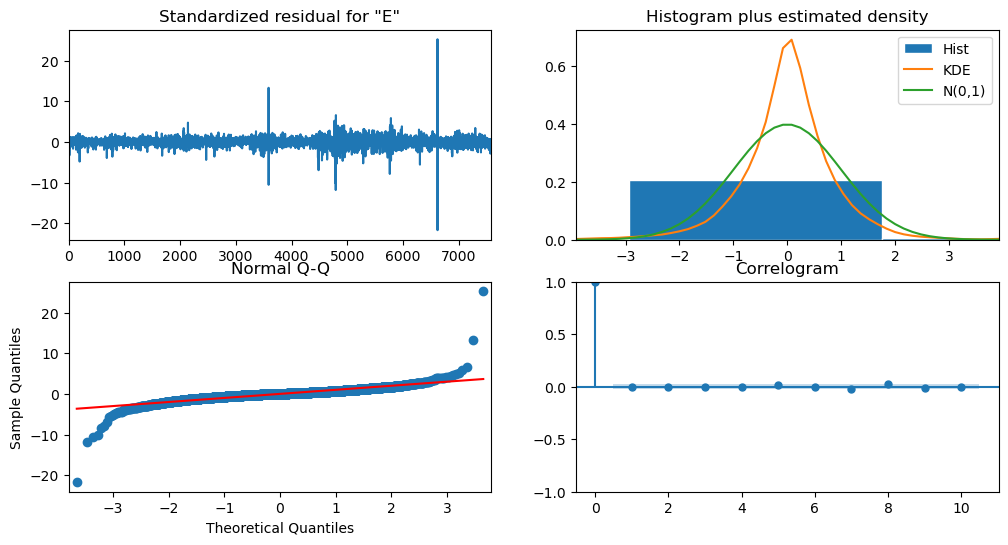

In [113]:
#Check if the residuals (errors) are randomly distributed.
arima_result.plot_diagnostics(figsize=(12, 6))
plt.show()

##### 4. Forecasting with ARIMA

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


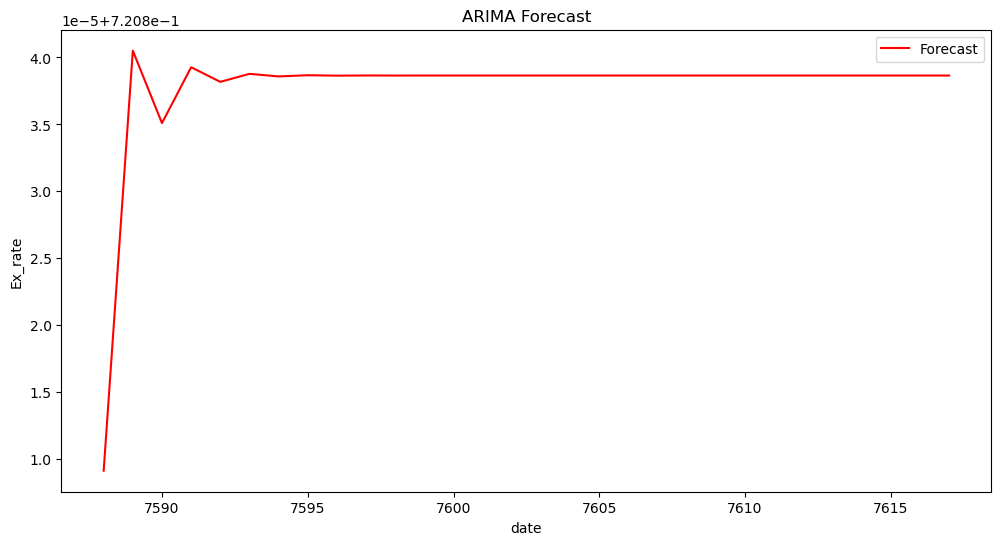

In [116]:
##### Forecast next 30 days
forecast= arima_result.forecast(steps=30)
# plot forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast, label='Forecast', color='red')
plt.xlabel('date')
plt.ylabel('Ex_rate')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

### 3: Exponential Smoothing

##### 1. Model Selection

In [123]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [125]:
#Fit Holt-Winters Model
exp_model = ExponentialSmoothing(df, trend='add', seasonal='add', seasonal_periods=12).fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [127]:
exp_model

##### 2. Forecasting with Exponential Smoothing

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


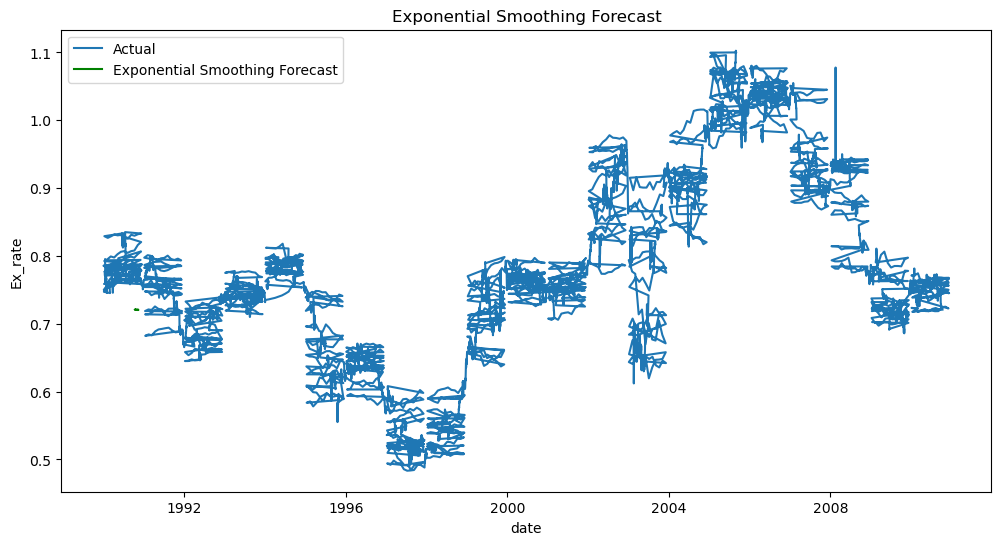

In [130]:
# Forecast for next 30 days
exp_forecast = exp_model.forecast(steps=30)
#plot forecast
plt.figure(figsize=(12,6))
plt.plot(df, label='Actual')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast', color='green')
plt.xlabel('date')
plt.ylabel('Ex_rate')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

### 4: Evaluation and Comparison

In [133]:
#Now the next step is to compare ARIMA and Exponential Smoothing, we calculate:
#Mean Absolute Error (MAE)
#Root Mean Squared Error (RMSE)
#Mean Absolute Percentage Error (MAPE)

In [139]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#calculate error metrics
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = mean_squared_error(actual, predicted)
    mape = (abs((actual - predicted) / actual).mean()) * 100
    return mae, rmse, mape
    

In [153]:
# Compute errors
arima_mae, arima_rmse, arima_mape = evaluate_model(df[-30:], forecast)
exp_mae, exp_rmse, exp_mape = evaluate_model(df[-30:], exp_forecast)

In [155]:
print(f"ARIMA - MAE: {arima_rmse}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
print(f"Exponential Smoothing - MAE: {exp_mae}, RMSE: {exp_rmse}, MAPE: {exp_mape}%")      

ARIMA - MAE: 0.0002881699094497449, RMSE: 0.0002881699094497449, MAPE: 7588      NaN
7589      NaN
7590      NaN
7591      NaN
7592      NaN
7593      NaN
7594      NaN
7595      NaN
7596      NaN
7597      NaN
7598      NaN
7599      NaN
7600      NaN
7601      NaN
7602      NaN
7603      NaN
7604      NaN
7605      NaN
7606      NaN
7607      NaN
7608      NaN
7609      NaN
7610      NaN
7611      NaN
7612      NaN
7613      NaN
7614      NaN
7615      NaN
7616      NaN
7617      NaN
Ex_rate   NaN
dtype: float64%
Exponential Smoothing - MAE: 0.012932323614806987, RMSE: 0.0002946646253605491, MAPE: 7588      NaN
7589      NaN
7590      NaN
7591      NaN
7592      NaN
7593      NaN
7594      NaN
7595      NaN
7596      NaN
7597      NaN
7598      NaN
7599      NaN
7600      NaN
7601      NaN
7602      NaN
7603      NaN
7604      NaN
7605      NaN
7606      NaN
7607      NaN
7608      NaN
7609      NaN
7610      NaN
7611      NaN
7612      NaN
7613      NaN
7614      NaN
7615      NaN
7

### Conclusion

In [158]:
# The ARIMA model is more accurate because ARIMA rmse is slighltly lower than that of mae.
# ARIMA works well for stationary series.
# Exponential Smoothing is better for trends and seasonality.